In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

# Analyze FLIP microscopic video data

import .xlsx data (one file is one sample in a group of samples in an experiment, replication are saved as datasheets)

In [2]:
workbook = xlrd.open_workbook('data/14.04.02 Myo2-3DR-GFP charge mutant FLIP.xlsx')

checkout the worksheets' name

In [3]:
workbook.sheet_names()

[u'SUMMARY',
 u'1.1',
 u'1.3',
 u'1.5',
 u'1.7',
 u'1.9',
 u'1.11',
 u'1.12',
 u'1.13',
 u'1.15',
 u'2.2',
 u'2.4',
 u'2.6',
 u'2.10',
 u'2.11']

In [4]:
datasheetStart =1
datarowStart = 6 #7th row in xlsx

In [5]:
worksheet = workbook.sheet_by_index(datasheetStart)
rowMax=worksheet.nrows
lines =[]
print rowMax

125


do the calculation in each datasheet and combine all the data into a dataframe

In [6]:
for i in range(datasheetStart, workbook.nsheets):
    worksheet = workbook.sheet_by_index(i)
    singleLine =[]
    for j in range (datarowStart, rowMax):
        singleLine.append(worksheet.cell(j,7).value /worksheet.cell(j,9).value) #H7/J7
    lines.append(singleLine)    

In [7]:
df = pd.DataFrame(lines)
df_transposed = df.T
df.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.269014,3.549955,4.429960,2.202930,3.701872,4.731162,3.719608,5.539072,5.901250,9.243627,4.865808,4.481288,2.257192,2.069612
1,3.290605,4.058999,4.096786,2.180392,3.478615,4.587508,3.751656,5.973512,6.223205,9.629164,4.566727,4.470583,2.301321,2.117469
2,3.138034,3.716308,4.004367,2.200372,3.404891,4.409572,3.645373,5.518500,6.435724,9.705986,4.494755,4.515023,2.350293,2.019066
3,3.170207,3.756404,3.870587,2.174992,3.502228,4.288342,3.576999,5.436325,6.293039,9.327719,4.517838,4.448038,2.283551,2.050373
4,2.837057,3.887585,3.846067,2.067669,3.502342,4.724718,3.380792,5.407009,6.030924,9.856865,4.194242,4.594260,2.468353,1.941265


Normalize the dataframe by divding with the first row

In [8]:
dfNormed= df_transposed/df_transposed.ix[0,:]

Take a look at each lines in the same sample

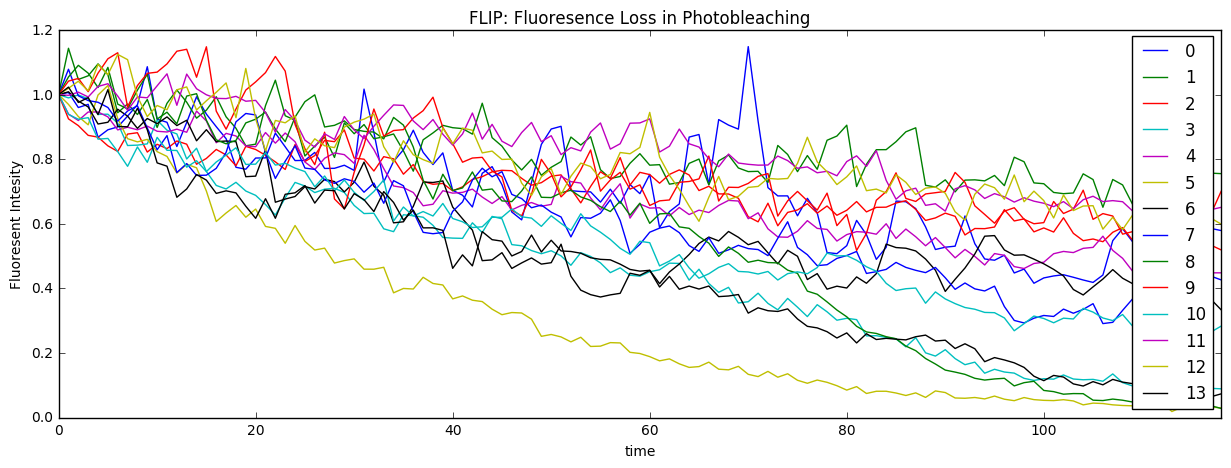

In [10]:
dfNormed.plot() #size
plt.rcParams['figure.figsize'] = (15, 5)
plt.xlabel('time')
plt.ylabel('Fluoresent Intesity')
plt.title('FLIP: Fluoresence Loss in Photobleaching')

In [11]:
dfNormed['mean'] = dfNormed.mean(axis=1)
dfNormed['std'] = dfNormed.std(axis=1)


In [12]:
dfNormed['time'] = range(0, 2*(rowMax-datarowStart),2)
dfNormed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,mean,std,time
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0
1,1.006605,1.143395,0.924791,0.989769,0.939691,0.969637,1.008616,1.078432,1.054557,1.041708,0.938534,0.997611,1.019550,1.023124,1.009716,0.056850,2
2,0.959933,1.046861,0.903929,0.998839,0.919776,0.932027,0.980042,0.996286,1.090570,1.050019,0.923743,1.007528,1.041246,0.975577,0.987598,0.054262,4
3,0.969775,1.058155,0.873730,0.987318,0.946069,0.906403,0.961660,0.981450,1.066391,1.009097,0.928487,0.992580,1.011678,0.990704,0.977393,0.051138,6
4,0.867863,1.095108,0.868195,0.938599,0.946100,0.998638,0.908911,0.976158,1.021974,1.066342,0.861983,1.025210,1.093550,0.937985,0.971901,0.078163,8


plot the mean with standard deviation:

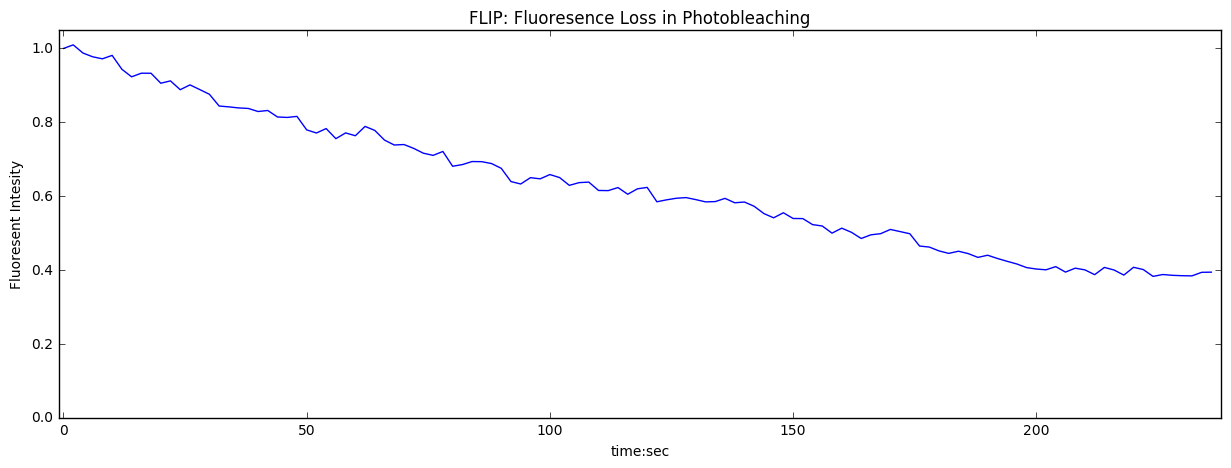

In [13]:
plt.plot(dfNormed['time'],dfNormed['mean'])
plt.xlim(-1,2*(rowMax-datarowStart))
plt.ylim(0,1.05)
plt.xlabel('time:sec')
plt.ylabel('Fluoresent Intesity')
plt.title('FLIP: Fluoresence Loss in Photobleaching')
plt.show()

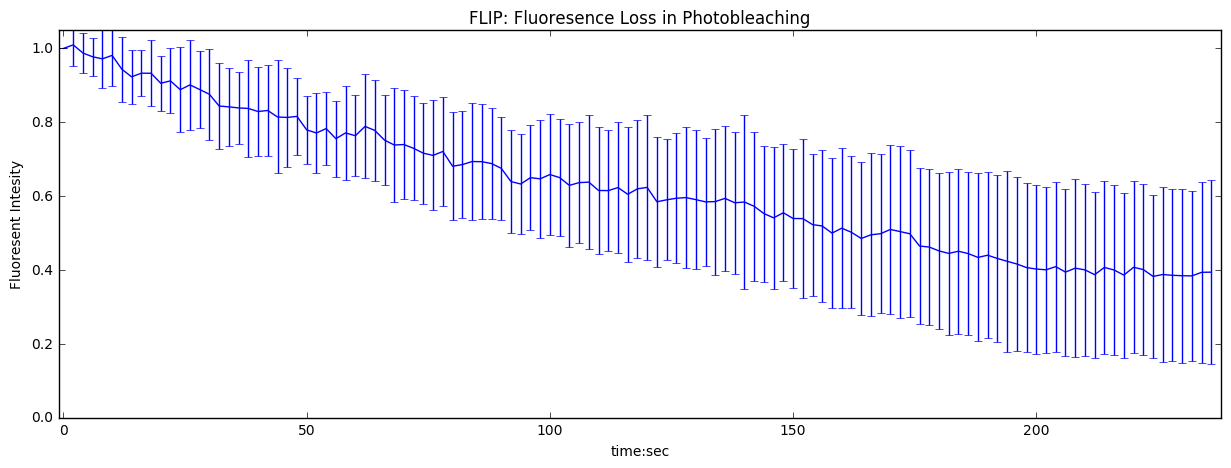

In [14]:
plt.errorbar(dfNormed['time'],dfNormed['mean'],dfNormed['std'])
plt.xlim(-1,2*(rowMax-datarowStart))
plt.ylim(0,1.05)
plt.xlabel('time:sec')
plt.ylabel('Fluoresent Intesity')
plt.title('FLIP: Fluoresence Loss in Photobleaching')
plt.show()

after the trial, wrap the above logic into a method for more xlsx files:

In [21]:
def process_xl(workbook, datasheetStart):
    lines =[]
    for i in range(datasheetStart, workbook.nsheets):
        worksheet = workbook.sheet_by_index(i)
        singleLine =[]
        for j in range (datarowStart, worksheet.nrows):
            singleLine.append(worksheet.cell(j,7).value /worksheet.cell(j,9).value) #H7/J7
        lines.append(singleLine) 
    df = pd.DataFrame(lines)
    df_transposed = df.T
    dfNormed= df_transposed/df_transposed.ix[0,:]
    dfNormed['mean'] = dfNormed.mean(axis=1)
    dfNormed['std'] = dfNormed.std(axis=1)
    dfNormed['time'] = range(0, 2*(worksheet.nrows-datarowStart),2)
    return dfNormed

Similarly, process all the xlsx files in this experiment:

In [22]:
workbook2 = xlrd.open_workbook('data/14.04.02 Myo2-3DR-REKE-GFP charge mutant FLIP.xlsx')
workbook2.sheet_names()

[u'SUMMARY',
 u'1.2',
 u'1.3',
 u'1.6',
 u'1.8',
 u'1.9',
 u'1.11',
 u'1.12',
 u'1.15',
 u'1.16',
 u'1.19',
 u'1.20',
 u'1.22',
 u'1.23',
 u'1.27',
 u'1.28']

In [23]:
datasheetStart =1
dfNormed2 = process_xl(workbook2, datasheetStart)

In [26]:
workbook3 = xlrd.open_workbook('data/14.04.02 Myo2-GFP charge mutant FLIP.xlsx')
workbook3.sheet_names()

[u'SUMMARY',
 u'1.1',
 u'1.4',
 u'1.5',
 u'1.9',
 u'1.11',
 u'1.13',
 u'1.15',
 u'1.17',
 u'1.19',
 u'1.21',
 u'1.23',
 u'1.25']

In [27]:
datasheetStart =1
dfNormed3 = process_xl(workbook3, datasheetStart)

In [42]:
workbook4 = xlrd.open_workbook('data/14.04.02 Myo2-REKE-GFP charge mutant FLIP.xlsx')
dfNormed4 = process_xl(workbook4, datasheetStart)

combind all the mean and std data into one table:

In [43]:
dfs=pd.concat([dfNormed['mean'], dfNormed['std'], dfNormed2['mean'],dfNormed2['std'], \
             dfNormed3['mean'], dfNormed3['std'], dfNormed4['mean'],dfNormed4['std'], \
               dfNormed['time']],\
              axis=1, keys=['df1','std1', 'df2', 'std2','df3','std3', 'df4', 'std4','time'])

and plot out the final result:

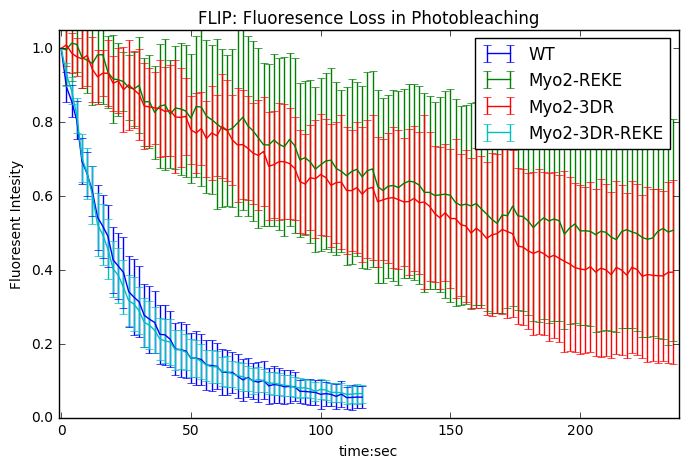

In [50]:
plt.errorbar(dfs['time'],dfs['df3'],dfs['std3'], label="WT")
plt.errorbar(dfs['time'],dfs['df4'],dfs['std4'], label="Myo2-REKE")
plt.errorbar(dfs['time'],dfs['df1'],dfs['std1'], label="Myo2-3DR")
plt.errorbar(dfs['time'],dfs['df2'],dfs['std2'], label="Myo2-3DR-REKE")
plt.legend()
plt.xlim(-1,2*(rowMax-datarowStart))
plt.ylim(0,1.05)
plt.xlabel('time:sec')
plt.ylabel('Fluoresent Intesity')
plt.title('FLIP: Fluoresence Loss in Photobleaching')
plt.rcParams['figure.figsize'] = (8, 5)
plt.show()

The two mutants have much slower FLIP rate compared to the WT. However, combinding the two mutations compensate each other.